In [11]:
import pandas as pd

# Load the file and display column names
df = pd.read_csv('spam.csv', encoding='latin-1')
print(df.columns)


Index(['text', 'target'], dtype='object')


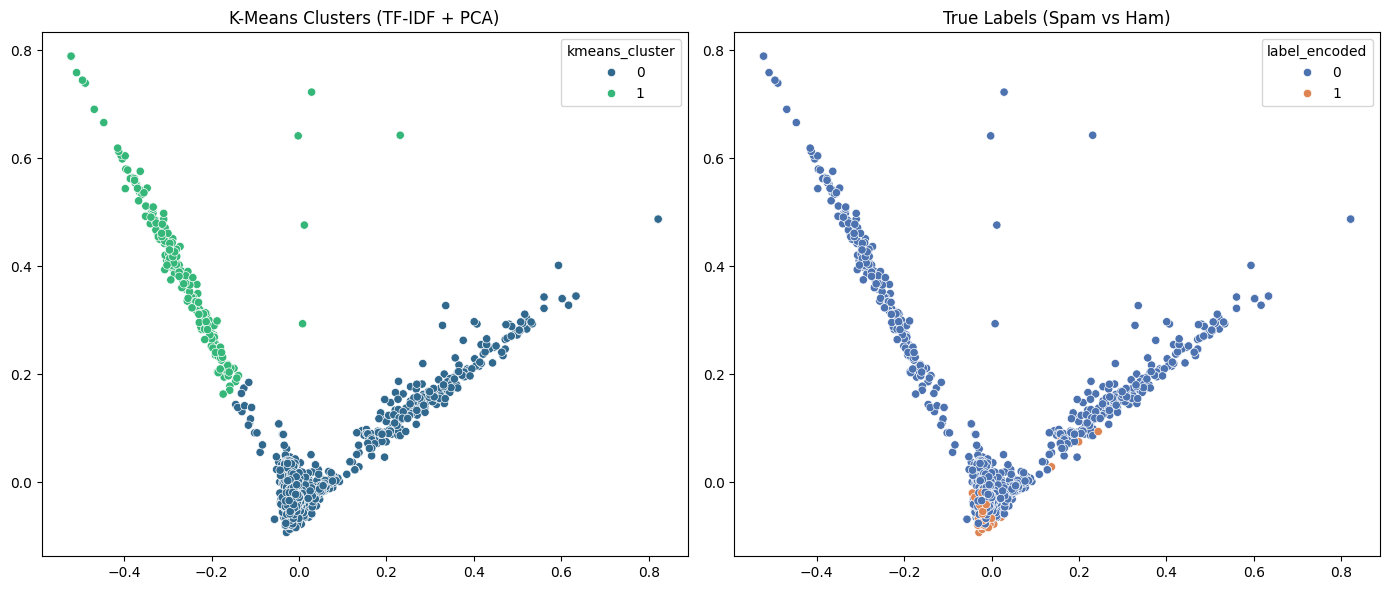

In [12]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Dataset
df = pd.read_csv('spam.csv')  # Already uploaded in Colab
df = df[['text', 'target']]   # Your actual column names

# Step 3: Encode label (if not already numeric)
if df['target'].dtype == 'object':
    df['label_encoded'] = LabelEncoder().fit_transform(df['target'])
else:
    df['label_encoded'] = df['target']

# Step 4: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(df['text'])

# Step 5: Apply PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Step 6: K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_pca)

# Step 7: Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=2)
df['agglo_cluster'] = agglo.fit_predict(X_pca)

# Step 8: Plotting
plt.figure(figsize=(14, 6))

# Plot 1: K-means clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['kmeans_cluster'], palette='viridis')
plt.title("K-Means Clusters (TF-IDF + PCA)")

# Plot 2: True labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['label_encoded'], palette='deep')
plt.title("True Labels (Spam vs Ham)")

plt.tight_layout()
plt.show()
